import useful tools

In [1]:
import os                       
import numpy as np              
import pandas as pd            
import seaborn as sns
import torch                    
import matplotlib.pyplot as plt 
import torch.nn as nn          
from torch.utils.data import DataLoader 
from PIL import Image           
import torch.nn.functional as F 
import torchvision.transforms as transforms    
from torchvision.utils import make_grid       
from torchvision.datasets import ImageFolder  
from torchsummary import summary              
import tensorflow as ts 
from  tensorflow import keras
import itertools
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import pydot
import graphviz

%matplotlib inline

data path

In [2]:
train_dir = "./Downloads/melanoma_cancer_dataset/train"

test_dir = "./Downloads/melanoma_cancer_dataset/test"

skin = os.listdir(train_dir)

Train the data

In [3]:
nums_train = {}
nums_val = {}

for s in skin:
    nums_train[s] = len(os.listdir(train_dir + '/' + s))
img_per_class_train = pd.DataFrame(nums_train.values(), index=nums_train.keys(), columns=["number of images"])

print('Train data distribution :')
img_per_class_train

Train data distribution :


,number of images
benign,5000
malignant,4605


<AxesSubplot:title={'center':'data distribution '}, xlabel='Skin cancer type', ylabel='Number of training images'>

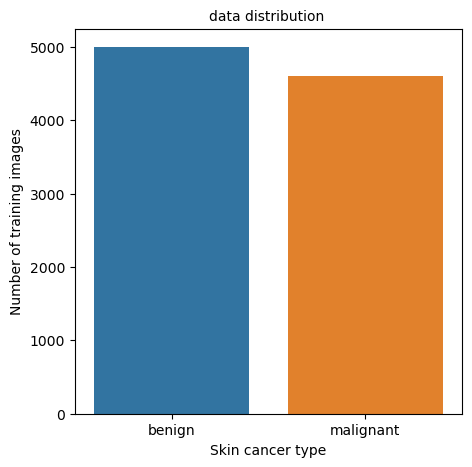

In [4]:
plt.figure(figsize=(5,5))
plt.title('data distribution ',fontsize=10)
plt.ylabel('Number of training images',fontsize=10)
plt.xlabel('Skin cancer type',fontsize=10)

keys = list(nums_train.keys())
vals = list(nums_train.values())
sns.barplot(x=keys, y=vals)

In [5]:
nums_test = {}
nums_val1 = {}

for s in skin:
    nums_test[s] = len(os.listdir(test_dir + '/' + s))
    
img_per_class_test = pd.DataFrame(nums_test.values(), index=nums_test.keys(), columns=["number of images"])

print('Testing data distribution :')
img_per_class_test

Testing data distribution :


,number of images
benign,500
malignant,500


<AxesSubplot:title={'center':'data distribution '}, xlabel='Skin cancer type', ylabel='Number of testing images'>

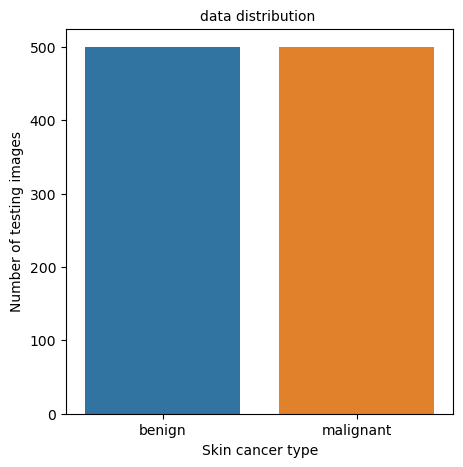

In [6]:
plt.figure(figsize=(5,5))
plt.title('data distribution ',fontsize=10)
plt.ylabel('Number of testing images',fontsize=10)
plt.xlabel('Skin cancer type',fontsize=10)

keys1 = list(nums_test.keys())
vals1 = list(nums_test.values())
sns.barplot(x=keys1, y=vals1)

Show some images

In [7]:
train = ImageFolder(train_dir, transform=transforms.ToTensor())
def show_image(image, label):
    print("Label :" + train.classes[label] + "(" + str(label) + ")")
    return image.permute(1, 2, 0)

benign images

Label :benign(0)
Label :benign(0)
Label :benign(0)
Label :benign(0)
Label :benign(0)
Label :benign(0)
Label :benign(0)
Label :benign(0)
Label :benign(0)
Label :benign(0)
Label :benign(0)
Label :benign(0)


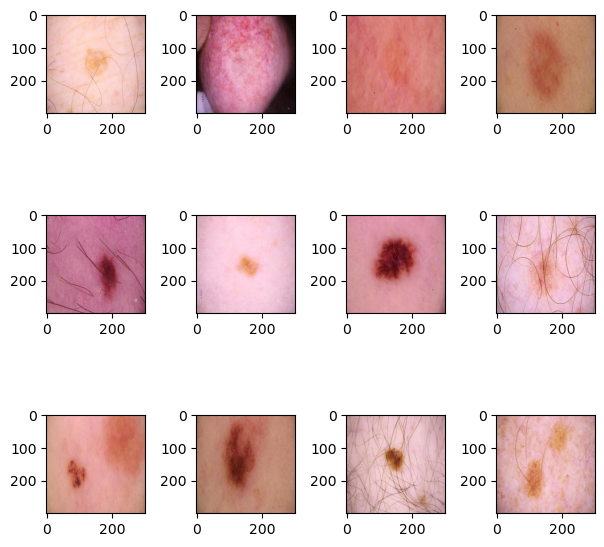

In [8]:
fig, axs = plt.subplots(3, 4,figsize=(6,6))
fig.tight_layout(pad=0)
axs[0,0].imshow(show_image(*train[1]))
axs[0,1].imshow(show_image(*train[126]))
axs[0,2].imshow(show_image(*train[228]))
axs[0,3].imshow(show_image(*train[267]))
axs[1,0].imshow(show_image(*train[345]))
axs[1,1].imshow(show_image(*train[398]))
axs[1,2].imshow(show_image(*train[637]))
axs[1,3].imshow(show_image(*train[762]))
axs[2,0].imshow(show_image(*train[811]))
axs[2,1].imshow(show_image(*train[852]))
axs[2,2].imshow(show_image(*train[962]))
axs[2,3].imshow(show_image(*train[1297]))

malignant images 

Label :malignant(1)
Label :malignant(1)
Label :malignant(1)
Label :malignant(1)
Label :malignant(1)
Label :malignant(1)
Label :malignant(1)
Label :malignant(1)
Label :malignant(1)
Label :malignant(1)
Label :malignant(1)
Label :malignant(1)


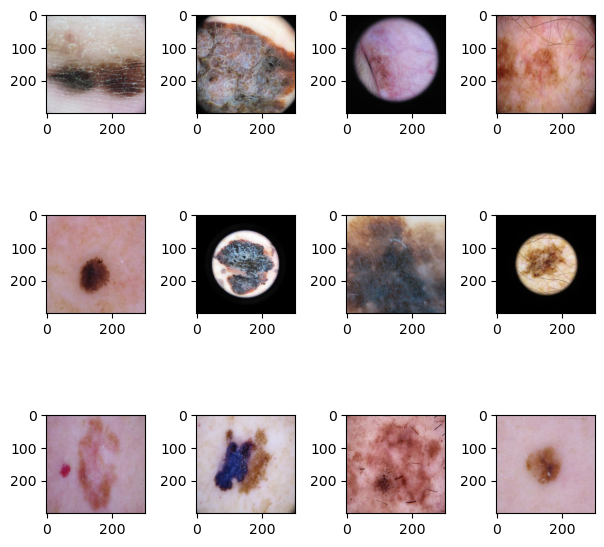

In [9]:
fig, axs = plt.subplots(3, 4,figsize=(6,6))
fig.tight_layout(pad=0)
axs[0,0].imshow(show_image(*train[6000]))
axs[0,1].imshow(show_image(*train[6842]))
axs[0,2].imshow(show_image(*train[6975]))
axs[0,3].imshow(show_image(*train[7022]))
axs[1,0].imshow(show_image(*train[7134]))
axs[1,1].imshow(show_image(*train[8021]))
axs[1,2].imshow(show_image(*train[8246]))
axs[1,3].imshow(show_image(*train[9012]))
axs[2,0].imshow(show_image(*train[9314]))
axs[2,1].imshow(show_image(*train[9402]))
axs[2,2].imshow(show_image(*train[9527]))
axs[2,3].imshow(show_image(*train[9599]))

create a Convolutional neural network(CNN) model

In [10]:
train_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255,rotation_range = 20, horizontal_flip = True,validation_split = 0.25)

valid_gen =  keras.preprocessing.image.ImageDataGenerator(rescale=1./255,validation_split = 0.25)

train_data = train_gen.flow_from_directory(train_dir, subset='training', target_size=(224,224), batch_size=64, color_mode='rgb', class_mode='categorical', shuffle=True)

test_data = valid_gen.flow_from_directory(train_dir, subset='validation', target_size=(224,224), batch_size=64, color_mode='rgb', class_mode='categorical', shuffle=False)

Found 7204 images belonging to 2 classes.
Found 2401 images belonging to 2 classes.


In [11]:
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(32, 3, activation='relu', input_shape=(224, 224, 3)))

model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.MaxPooling2D())

model.add(keras.layers.Conv2D(64, 3, activation='relu'))
model.add(keras.layers.Dropout(0.15))
model.add(keras.layers.MaxPooling2D())

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(2, activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 dropout (Dropout)           (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 dropout_1 (Dropout)         (None, 109, 109, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                    

In [12]:
history = model.fit(train_data, validation_data=test_data, epochs = 10)

Epoch 1/10
113/113 [==============================] - 660s 6s/step - loss: 0.9480 - accuracy: 0.6625 - val_loss: 0.4836 - val_accuracy: 0.7863
Epoch 2/10
113/113 [==============================] - 348s 3s/step - loss: 0.4975 - accuracy: 0.7642 - val_loss: 0.3782 - val_accuracy: 0.8613
Epoch 3/10
113/113 [==============================] - 314s 3s/step - loss: 0.3435 - accuracy: 0.8647 - val_loss: 0.3558 - val_accuracy: 0.8326
Epoch 4/10
113/113 [==============================] - 309s 3s/step - loss: 0.3168 - accuracy: 0.8669 - val_loss: 0.4269 - val_accuracy: 0.8117
Epoch 5/10
113/113 [==============================] - 347s 3s/step - loss: 0.3154 - accuracy: 0.8663 - val_loss: 0.2705 - val_accuracy: 0.8884
Epoch 6/10
113/113 [==============================] - 348s 3s/step - loss: 0.2884 - accuracy: 0.8788 - val_loss: 0.3483 - val_accuracy: 0.8571
Epoch 7/10
113/113 [==============================] - 349s 3s/step - loss: 0.2799 - accuracy: 0.8801 - val_loss: 0.2996 - val_accuracy: 0.8780

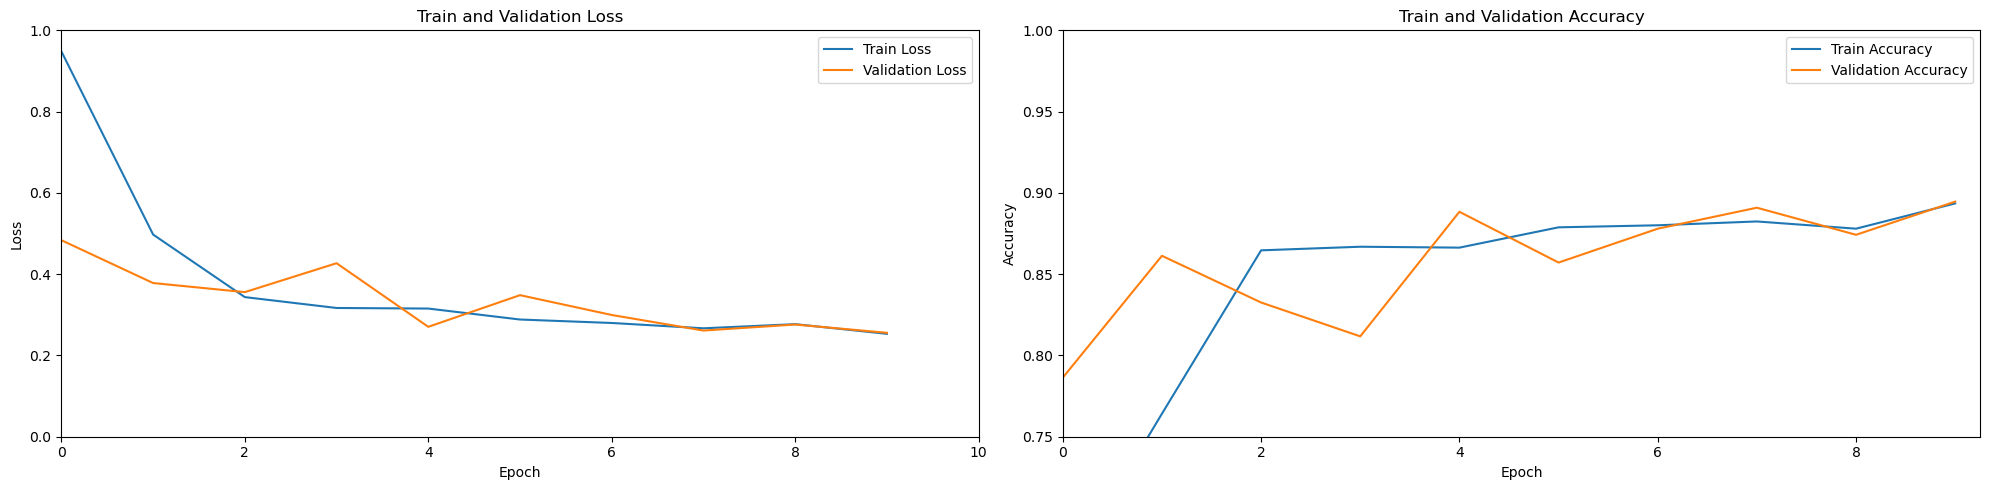

In [14]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Train and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(history.history['loss'],label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlim(0, 10)
plt.ylim(0.0,1.0)
plt.legend()

plt.subplot(1,2,2)
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlim(0, 9.25)
plt.ylim(0.75,1.0)
plt.legend()
plt.tight_layout()

In [15]:
from sklearn.metrics import classification_report

Y_pred = model.predict(test_data)
y_pred = np.argmax(Y_pred, axis=1)

print(classification_report(test_data.classes, y_pred))

38/38 [==============================] - 16s 404ms/step
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      1250
           1       0.91      0.86      0.89      1151

    accuracy                           0.89      2401
   macro avg       0.90      0.89      0.89      2401
weighted avg       0.90      0.89      0.89      2401



#author name: Xi Yang